In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
peak_anno = pd.read_csv("../data/intermediate/RPL22-ZR751_clearCLIP.pool.tag.uniq.del.CIMS.fdr10.f10.bed.anno.csv",
                        index_col=0)

In [54]:
def get_distance_to_tss(row):
    if row["geneStrand"] == 1:
        
        start_diff = row["start"] - row["geneStart"]
        end_diff = row["end"] - row["geneStart"]
    else:
        start_diff = row["geneEnd"] - row["start"]
        end_diff = row["geneEnd"]-row["end"]
        
    if abs(start_diff) >= abs(end_diff):
        return end_diff
    else:
        return start_diff
    
def get_distance_to_tts(row):
    if row["geneStrand"] == 1:
        
        start_diff = row["start"] - row["geneEnd"]
        end_diff = row["end"] - row["geneEnd"]
    else:
        start_diff = row["geneStart"] - row["start"]
        end_diff = row["geneStart"]-row["end"]
        
    if abs(start_diff) >= abs(end_diff):
        return end_diff
    else:
        return start_diff
    
peak_anno["distance_to_tss"] = peak_anno.apply(get_distance_to_tss, axis=1)
peak_anno["distance_to_tts"] = peak_anno.apply(get_distance_to_tts, axis=1)

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1000.0, 1000.0)

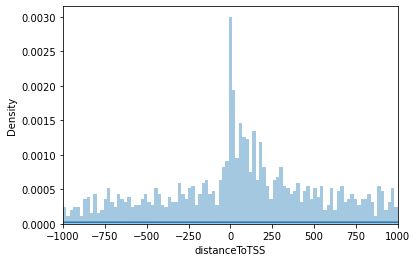

In [55]:
sns.distplot(peak_anno["distanceToTSS"],bins=np.linspace(-1000,1000,100))
plt.xlim(-1000,1000)

In [56]:
peak_anno[(peak_anno["distance_to_tts"]<0)&(peak_anno["distance_to_tts"]>-250)]

,seqnames,start,end,width,strand,V4,V5,V6,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,distance_to_TSS,distance_to_tss,distance_to_tts
1,chr1,11908230,11908250,21,*,chr1_f_c56[k=1769][m=301],301,+,Promoter (<=1kb),1,11908152,11908271,120,1,26829,ENST00000362477.1,78,41,78,-21
25,chr17,40457662,40457682,21,*,chr17_f_c187[k=302][m=163],163,+,3' UTR,17,40443450,40457725,14276,1,3487,ENST00000269593.5,14212,63,14212,-43
63,chr15,64963044,64963064,21,*,chr15_r_c158[k=137][m=129],129,-,3' UTR,15,64963027,64981627,18601,2,51324,ENST00000559199.5,18563,18583,18563,-17
74,chr19,18575184,18575204,21,*,chr19_f_c147[k=128][m=125],125,+,Promoter (1-2kb),19,18573376,18575241,1866,1,7311,ENST00000594527.1,1808,57,1808,-37
104,chr16,84053762,84053782,21,*,chr16_r_c248[k=118][m=114],114,-,3' UTR,16,84053761,84058044,4284,2,8720,ENST00000562906.2,4262,4282,4262,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,chr19,49489983,49490003,21,*,chr19_f_c332[k=2][m=2],2,+,Promoter (<=1kb),19,49489965,49490048,84,1,26819,ENST00000364805.1,18,65,18,-45
6374,chr19,54461967,54461987,21,*,chr19_f_c360[k=2][m=2],2,+,Promoter (1-2kb),19,54461732,54463778,2047,2,94059,ENST00000611161.2,1791,1811,1791,-235
6440,chr3,134561508,134561528,21,*,chr3_f_c385[k=2][m=2],2,+,3' UTR,3,134557454,134561749,4296,1,80254,ENST00000682388.1,4054,241,4054,-221
6550,chr7,64337190,64337210,21,*,chr7_f_c158[k=2][m=2],2,+,"Exon (ENST00000488621.1/728927, exon 3 of 3)",7,64314014,64337362,23349,1,728927,ENST00000488621.1,23176,172,23176,-152


/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1000.0, 1000.0)

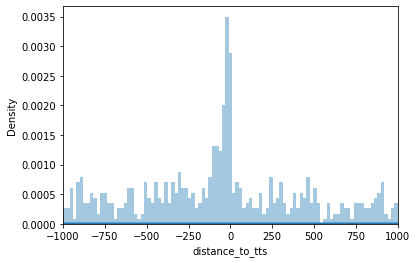

In [48]:
sns.distplot(peak_anno["distance_to_tts"],bins=np.linspace(-1000,1000,100))
plt.xlim(-1000,1000)